In [92]:
import csv
import numpy as np
from scipy.stats import gmean, gstd
import matplotlib.pyplot as plt
import ast
import statistics

In [93]:
# LOADING
general_path = (
    # "/home/matthias/rwth/ba/process-tree-alignments-cpp/remote_res/0/"
    "/home/matthias/rwth/ba/process-tree-alignments-cpp/snus/"
)

# other_paths = ["other/BPI_Challenge_2012/","other/BPI_Challenge_2017/"]
# other_paths = ["other/BPI_Challenge_2017/"]
other_paths = ["other/BPI_Challenge_2012/"]
time_names = ["times_pt00.csv", "times_pt10.csv", "times_pt25.csv", "times_pt50.csv"]
cost_names = ["costs_pt00.csv", "costs_pt10.csv", "costs_pt25.csv", "costs_pt50.csv"]

specific_paths = [
    "BPI_Challenge_2012_pt00/",
    "BPI_Challenge_2012_pt10/",
    "BPI_Challenge_2012_pt25/",
    "BPI_Challenge_2012_pt50/",
]
# specific_paths = [
#     "BPI_Challenge_2017_pt00/",
#     "BPI_Challenge_2017_pt10/",
#     "BPI_Challenge_2017_pt25/",
#     "BPI_Challenge_2017_pt50/",
# ]
# dyn_paths = dyn_paths + ["BPI_Challenge_2017_pt00/","BPI_Challenge_2017_pt10/","BPI_Challenge_2017_pt25/","BPI_Challenge_2017_pt50/"]

# specific_paths = specific_paths +  ["BPI_Challenge_2017_pt00/","BPI_Challenge_2017_pt10/","BPI_Challenge_2017_pt25/","BPI_Challenge_2017_pt50/"]

num_files = len(time_names) * len(other_paths)
files_per_set = len(time_names)
data = [([0] * 7) for _ in range(1000 * num_files)]

mapper = dict()
for i in range(num_files):
    mapper[i] = dict()

for i, specific_path in enumerate(specific_paths):
    path = general_path + "dyn/" + specific_path + "costs.csv"
    with open(path, "r", newline="") as file:
        reader = csv.reader(file)
        for count, row in enumerate(reader):
            if row and len(row) >= 2:
                first_two_strings = row[:2]
                try:
                    first_two_values = [
                        float(val.strip()) if "." in val else int(val.strip())
                        for val in first_two_strings
                    ]
                    data[1000 * i + count][0] = first_two_values[0]
                    data[1000 * i + count][1] = first_two_values[1]

                    cleaned_tuple = tuple(
                        [
                            item.strip().strip("'").strip("[]").strip("'")
                            for item in row[2:]
                        ]
                    )
                    mapper[i][cleaned_tuple] = count
                    # print()

                except ValueError as e:
                    print(
                        f"Warning: Could not convert values in row {row[:4]} to numbers. Skipping row. Error: {e}"
                    )
                    # You might want to handle rows with non-numeric values differently
            elif row:
                print(f"Warning: Row has fewer than 4 elements. Skipping row: {row}")


for i in range(num_files):
    other_path_time = (
        general_path + other_paths[i // files_per_set] + time_names[i % files_per_set]
    )
    other_path_cost = (
        general_path + other_paths[i // files_per_set] + cost_names[i % files_per_set]
    )

    counter = 0
    with open(other_path_time, "r", newline="") as file:
        reader = csv.reader(file)
        for j, row in enumerate(reader):
            trace = ast.literal_eval(row[3])
            index_position = mapper[i][trace]
            # Ensure the row is not empty and has at least 4 elements
            if row and len(row) >= 4:
                two_time = row[:2]
                first_two_values = [
                    float(val.strip()) if "." in val else int(val.strip())
                    for val in two_time
                ]
                data[i * 1000 + index_position][3] = first_two_values[0]
                data[i * 1000 + index_position][5] = first_two_values[1]
                
    print(counter)
    with open(other_path_cost, "r", newline="") as file:
        reader = csv.reader(file)
        for j, row in enumerate(reader):
            trace = ast.literal_eval(row[3])
            index_position = mapper[i][trace]
            # Ensure the row is not empty and has at least 4 elements
            if row and len(row) >= 4:
                two_cost = row[:2]
                first_two_values = [
                    float(val.strip()) if "." in val else int(val.strip())
                    for val in two_cost
                ]
                data[i * 1000 + index_position][2] = first_two_values[0]
                data[i * 1000 + index_position][4] = first_two_values[1]
                data[i * 1000 + index_position][6] = len(ast.literal_eval(row[3]))

print(data[0])

0
0
0
0
[0, 0.0036935806274414062, -1.0, 1.2959725968539715, 0.0, 0.9679997470229864, 29]


In [94]:
# PERFORMANCE FACTORS
performance_factors = []

dyn_exec = 0
approx_exec = 0
milp_exec = 0

dyn = []
approx = []
milp = []

timeouts = 0
counter = 0
# for val in spec_data[3]:
for x, val in enumerate(data):
    if val[1] != -1:
        if val[0] != val[4] :
            print(x)
            counter += 1
            
        performance_factors.append((val[3] / val[1], val[5] / val[1]))

        approx.append(val[5])
        milp.append(val[3])
        dyn.append(val[1])
        
        dyn_exec += val[1]
        milp_exec += val[3]
        approx_exec += val[5]
    else:
        timeouts += 1
print(counter)
print(len(performance_factors))

0
4000


In [95]:
# PERFORMANCE FACTORS
valid_executions = len(performance_factors)
milpf = [x[0] for x in performance_factors]
apf = [x[1] for x in performance_factors]
geo_mean_milp = gmean(milpf)
geo_mean_approx = gmean(apf)
print(f"Geometric mean performance factor compared to MILP: {geo_mean_milp:.3f}")
print(f"Geometric mean performance factor compared to Approx: {geo_mean_approx:.3f}")

dyn_stdv = statistics.stdev(dyn)  # Sample standard deviation
approx_stdv = statistics.stdev(approx)  # Sample standard deviation
milp_stdv = statistics.stdev(milp)  # Sample standard deviation

print(f"Standard Deviation Dynamic : {dyn_stdv:.3f}")
print(f"Standard Deviation Approx : {approx_stdv:.3f}")
print(f"Standard Deviation MILP : {milp_stdv:.3f}")


# Round average python runtime to 3 decimal pnohup python3 scripts/alignment_comparison.py > output.log 2> error.log &laces
print(f"average dynamic runtime: {dyn_exec / valid_executions:.3f}")
print(f"average approx runtime: {approx_exec / valid_executions:.3f}")
print(f"average milp runtime: {milp_exec / valid_executions:.3f}")

print(f"Timeouts of dynamic: {timeouts}")
# Min performance factor doesn't need rounding unless it's a float display issue
print(f"min performance factor milp: {min(milpf):.3f}")
print(f"min performance factor approx: {min(apf):.3f}")

Geometric mean performance factor compared to MILP: 279.212
Geometric mean performance factor compared to Approx: 182.681
Standard Deviation Dynamic : 2.228
Standard Deviation Approx : 0.847
Standard Deviation MILP : 0.590
average dynamic runtime: 0.158
average approx runtime: 1.143
average milp runtime: 1.493
Timeouts of dynamic: 0
min performance factor milp: 0.058
min performance factor approx: 0.056


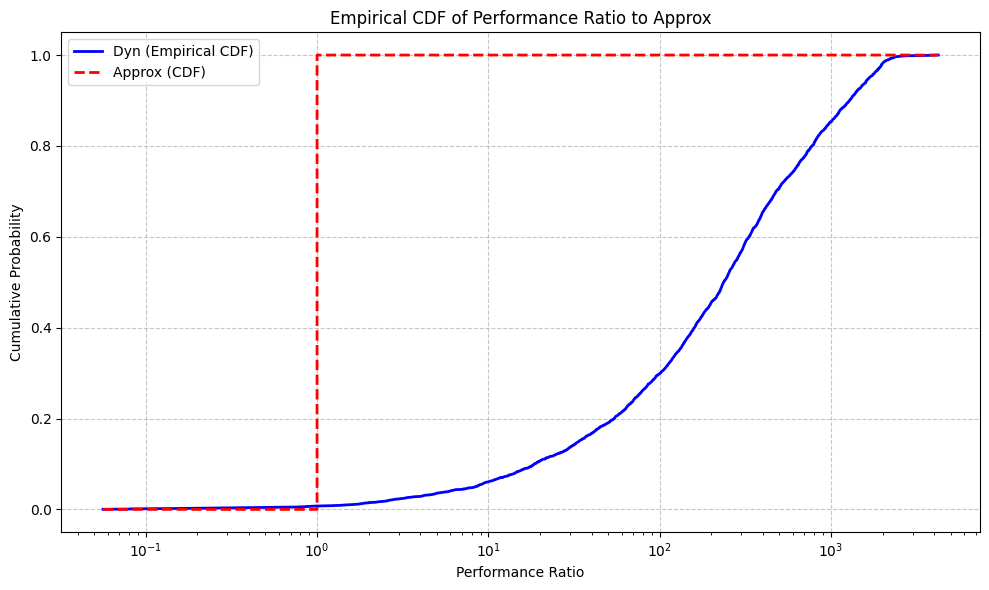

In [96]:
plt.figure(figsize=(10, 6))
colors = ["blue", "red"]

sorted_milpf = np.sort(apf)
y_cdf_dyn = np.arange(1, len(sorted_milpf) + 1) / len(sorted_milpf)

y_cdf_ap = np.where(sorted_milpf < 1.0, 0.0, 1.0)

plt.plot(sorted_milpf, y_cdf_dyn, color=colors[0], linewidth=2, label="Dyn (Empirical CDF)")

py_x = []
py_y = []
has_one = False
for i, x_val in enumerate(sorted_milpf):
    if x_val < 1.0:
        py_x.append(x_val)
        py_y.append(0.0)
    elif x_val >= 1.0 and not has_one:
        # Add a point just before 1.0 at y=0, then at 1.0 at y=1 to create the step
        if py_x and py_x[-1] < 1.0: # Ensure we don't duplicate if already added
             py_x.append(1.0 - 1e-9) # A tiny bit less than 1
             py_y.append(0.0)
        py_x.append(1.0)
        py_y.append(1.0)
        has_one = True # Mark that we've crossed the 1.0 threshold
    elif x_val > 1.0:
        py_x.append(x_val)
        py_y.append(1.0)

# Handle the case where all performance factors are >= 1.0
if not has_one and len(sorted_milpf) > 0 and sorted_milpf[0] >= 1.0:
    py_x.append(0.0) # Start from 0 for values less than 1.0 (conceptual)
    py_y.append(0.0)
    py_x.append(1.0)
    py_y.append(1.0)
    for x_val in sorted_milpf:
        if x_val >= 1.0:
            py_x.append(x_val)
            py_y.append(1.0)

plt.plot(py_x, py_y, color=colors[1], linewidth=2, linestyle='--', label="Approx (CDF)")


# --- Set scales ---
plt.yscale('linear') # CDFs are always linear on Y
plt.xscale('log') # X-axis can be log if performance ratios vary widely

# Add labels and styling
plt.xlabel("Performance Ratio")
plt.ylabel("Cumulative Probability")
plt.title("Empirical CDF of Performance Ratio to Approx")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

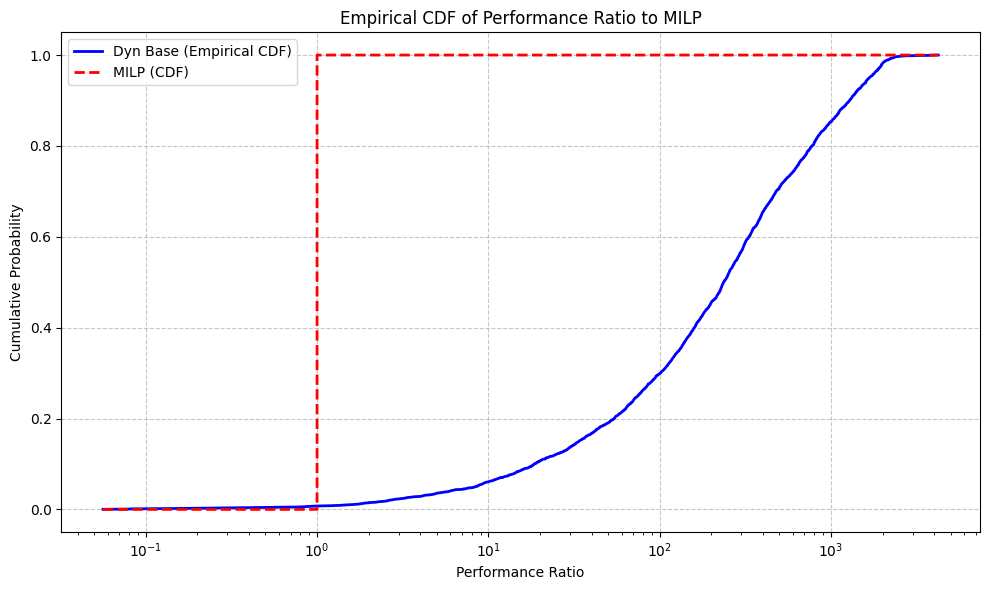

In [97]:
plt.figure(figsize=(10, 6))
colors = ["blue", "red"]

sorted_milpf = np.sort(apf)
y_cdf_dyn = np.arange(1, len(sorted_milpf) + 1) / len(sorted_milpf)

y_cdf_ap = np.where(sorted_milpf < 1.0, 0.0, 1.0)

plt.plot(sorted_milpf, y_cdf_dyn, color=colors[0], linewidth=2, label="Dyn Base (Empirical CDF)")

py_x = []
py_y = []
has_one = False
for i, x_val in enumerate(sorted_milpf):
    if x_val < 1.0:
        py_x.append(x_val)
        py_y.append(0.0)
    elif x_val >= 1.0 and not has_one:
        # Add a point just before 1.0 at y=0, then at 1.0 at y=1 to create the step
        if py_x and py_x[-1] < 1.0: # Ensure we don't duplicate if already added
             py_x.append(1.0 - 1e-9) # A tiny bit less than 1
             py_y.append(0.0)
        py_x.append(1.0)
        py_y.append(1.0)
        has_one = True # Mark that we've crossed the 1.0 threshold
    elif x_val > 1.0:
        py_x.append(x_val)
        py_y.append(1.0)

# Handle the case where all performance factors are >= 1.0
if not has_one and len(sorted_milpf) > 0 and sorted_milpf[0] >= 1.0:
    py_x.append(0.0) # Start from 0 for values less than 1.0 (conceptual)
    py_y.append(0.0)
    py_x.append(1.0)
    py_y.append(1.0)
    for x_val in sorted_milpf:
        if x_val >= 1.0:
            py_x.append(x_val)
            py_y.append(1.0)

plt.plot(py_x, py_y, color=colors[1], linewidth=2, linestyle='--', label="MILP (CDF)")


# --- Set scales ---
plt.yscale('linear') # CDFs are always linear on Y
plt.xscale('log') # X-axis can be log if performance ratios vary widely

# Add labels and styling
plt.xlabel("Performance Ratio")
plt.ylabel("Cumulative Probability")
plt.title("Empirical CDF of Performance Ratio to MILP")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

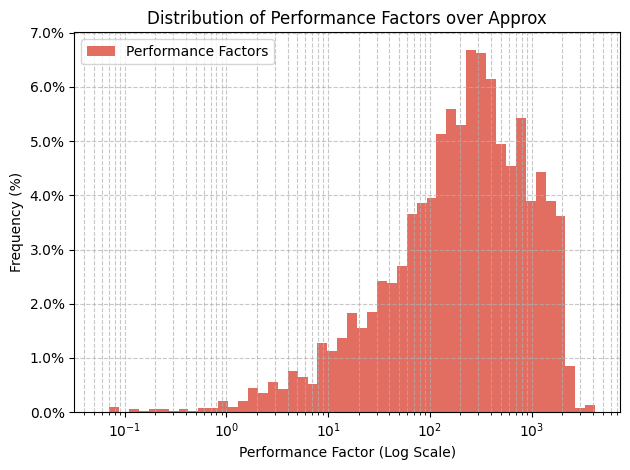

In [98]:
from matplotlib.ticker import PercentFormatter # MODIFICATION 1: Import the formatter

number_of_bins = 50

# Initial assignment of graphs; this will be updated if filtering occurs
graphs = [apf] # Use the actual data variable

colors = ['#d7301f'] # Example color list if not defined elsewhere
names = ['Performance Factors'] # Example name list if not defined elsewhere


min_val = np.min(apf)
max_val = np.max(apf)

if min_val <= 0:
    print(f"Warning: Data contains non-positive values (minimum: {min_val}). "
          "A standard logarithmic scale is only defined for positive numbers. "
          "Filtering data to be > 0 for plotting.")
    
    # Create a new variable for the filtered data
    filtered_performance_factors = apf[apf > 0]
    
    if len(filtered_performance_factors) == 0:
         print("Error: No positive data points found after filtering. Cannot plot on log scale.")
         exit() # Or return, raise error, etc.

    # Update min_val and max_val using the new filtered variable
    min_val = np.min(filtered_performance_factors)
    max_val = np.max(filtered_performance_factors)

    # Recalculate graphs list with the new filtered data variable
    graphs = [filtered_performance_factors]


# Ensure min_val is still positive after potential filtering before calculating logs
if min_val > 0:
    # Calculate the base-10 log of the min and max values
    log_min = np.log10(min_val)
    log_max = np.log10(max_val)

    log_bins = np.logspace(log_min, log_max, number_of_bins + 1)
else:
     print("Error: Minimum data value is not positive even after filtering. Cannot create log bins.")
     # Handle error, maybe plot on linear scale instead or exit
     log_bins = number_of_bins # Fallback, but plot won't look right with xscale('log')

# Create histograms for each data set
# `hist` automatically counts elements per bin and handles the plotting
for i, content in enumerate(graphs): # Use potentially filtered content
    # Using `hist` with `alpha` for transparency
    # Pass the logarithmically spaced bins to the hist function
    weights = np.ones_like(content, dtype=float) / len(content)
    
    # MODIFICATION 3: Use the 'weights' parameter instead of 'density'
    plt.hist(content, bins=log_bins, color=colors[i % len(colors)], alpha=0.7, label=names[i], weights=weights)

# --- Set the X-axis scale to logarithmic ---
plt.xscale('log')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))

# Add labels and styling
plt.xlabel("Performance Factor (Log Scale)") # Updated label for X-axis
# plt.ylabel("Frequency (Count of Elements)") # Y-axis is linear in this version (yscale is commented out)
plt.ylabel("Frequency (%)") # Update Y-axis label

plt.title("Distribution of Performance Factors over Approx") # Updated title
plt.grid(True, linestyle="--", alpha=0.7, which="both") # Add grid for both major and minor ticks (very helpful on log scales)
plt.legend()
plt.tight_layout() # Adjust layout to prevent labels overlapping

# Display the plot
plt.show()


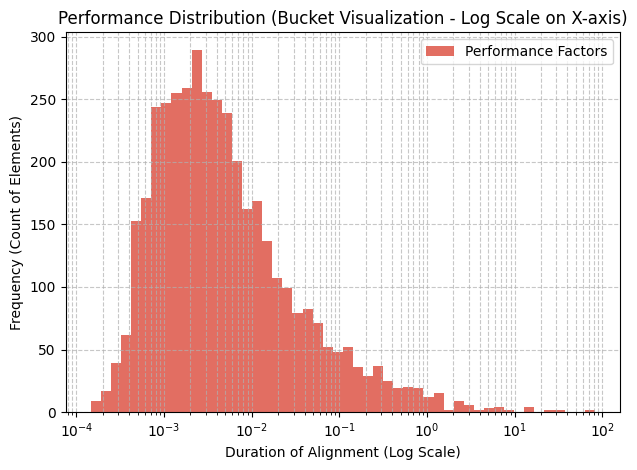

In [99]:
number_of_bins = 50

# Initial assignment of graphs; this will be updated if filtering occurs
graphs = [dyn.copy()] # Use the actual data variable

colors = ['#d7301f'] # Example color list if not defined elsewhere
names = ['Performance Factors'] # Example name list if not defined elsewhere


min_val = np.min(dyn)
max_val = np.max(dyn)

if min_val <= 0:
    print(f"Warning: Data contains non-positive values (minimum: {min_val}). "
          "A standard logarithmic scale is only defined for positive numbers. "
          "Filtering data to be > 0 for plotting.")
    
    # Create a new variable for the filtered data
    filtered_performance_factors = dyn[dyn > 0]
    
    if len(filtered_performance_factors) == 0:
         print("Error: No positive data points found after filtering. Cannot plot on log scale.")
         exit() # Or return, raise error, etc.

    # Update min_val and max_val using the new filtered variable
    min_val = np.min(filtered_performance_factors)
    max_val = np.max(filtered_performance_factors)

    # Recalculate graphs list with the new filtered data variable
    graphs = [filtered_performance_factors]


# Ensure min_val is still positive after potential filtering before calculating logs
if min_val > 0:
    # Calculate the base-10 log of the min and max values
    log_min = np.log10(min_val)
    log_max = np.log10(max_val)

    log_bins = np.logspace(log_min, log_max, number_of_bins + 1)
else:
     print("Error: Minimum data value is not positive even after filtering. Cannot create log bins.")
     # Handle error, maybe plot on linear scale instead or exit
     log_bins = number_of_bins # Fallback, but plot won't look right with xscale('log')

# Create histograms for each data set
# `hist` automatically counts elements per bin and handles the plotting
for i, content in enumerate(graphs): # Use potentially filtered content
    # Using `hist` with `alpha` for transparency
    # Pass the logarithmically spaced bins to the hist function
    plt.hist(content, bins=log_bins, color=colors[i % len(colors)], alpha=0.7, label=names[i], density=False)

# --- Set the X-axis scale to logarithmic ---
plt.xscale('log')

# Add labels and styling
plt.xlabel("Duration of Alignment (Log Scale)") # Updated label for X-axis
plt.ylabel("Frequency (Count of Elements)") # Y-axis is linear in this version (yscale is commented out)
plt.title("Performance Distribution (Bucket Visualization - Log Scale on X-axis)") # Updated title
plt.grid(True, linestyle="--", alpha=0.7, which="both") # Add grid for both major and minor ticks (very helpful on log scales)
plt.legend()
plt.tight_layout() # Adjust layout to prevent labels overlapping

# Display the plot
plt.show()


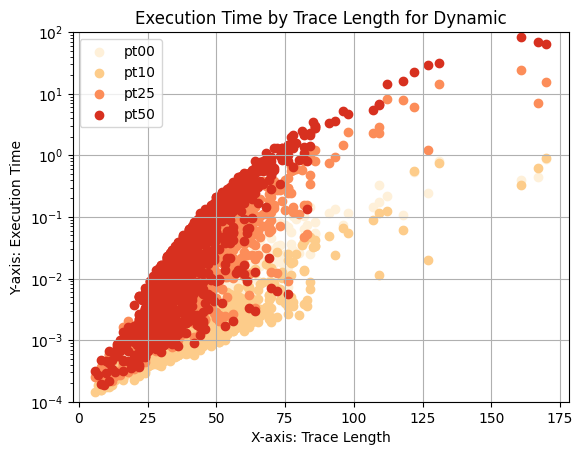

In [100]:
separate_data = [data[1000 * i: (i+1) * 1000] for i in range(num_files)]

# colors = ["red", "blue", "green", "yellow"]
colors = ["#fef0d9", "#fdcc8a", "#fc8d59", "#d7301f"]
# colors.reverse()

names = ["pt00", "pt10", "pt25", "pt50"]

for i, specific_data in enumerate(separate_data):
    # if i != 0:
    #     continue
    graph_data = [[x[-1], x[1]] for i, x in enumerate(specific_data)]
    # graph_data = [[x[-1], x[1]] for x in specific_data]
    # graph_data.sort(key=lambda x: x[0])

    x_values = [point[0] for point in graph_data]
    y_values = [point[1] for point in graph_data]

    plt.scatter(x_values, y_values, color=colors[i], label=names[i])

plt.yscale('log') # CDFs are always linear on Y

plt.xlabel("X-axis: Trace Length")
plt.ylabel("Y-axis: Execution Time")
plt.title("Execution Time by Trace Length for Dynamic")
ylim_fixed = (1e-4, 1e2) # You might still want a buffer for the upper limit
plt.ylim(ylim_fixed) # Apply the fixed Y-axis limits

# Add a grid (optional, but often helpful)
plt.grid(True)

# Add a legend to distinguish between datasets
plt.legend()

# Show the plot
plt.show()

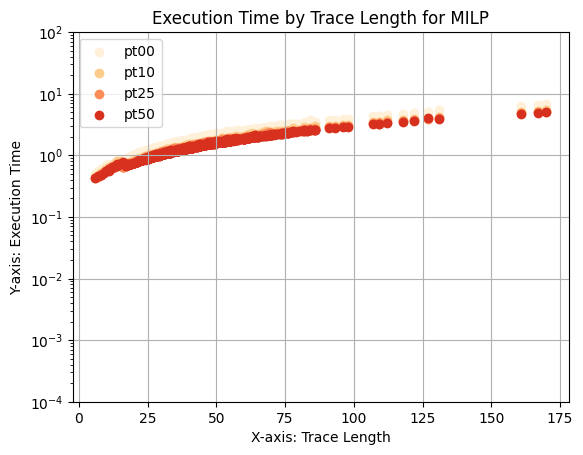

In [101]:
separate_data = [data[1000 * i: (i+1) * 1000] for i in range(num_files)]

# colors = ["red", "blue", "green", "yellow"]
colors = ["#fef0d9", "#fdcc8a", "#fc8d59", "#d7301f"]
# colors.reverse()

names = ["pt00", "pt10", "pt25", "pt50"]

for i, specific_data in enumerate(separate_data):
    # if i != 0:
    #     continue
    graph_data = [[x[-1], x[3]] for i, x in enumerate(specific_data)]
    # graph_data = [[x[-1], x[1]] for x in specific_data]
    # graph_data.sort(key=lambda x: x[0])

    x_values = [point[0] for point in graph_data]
    y_values = [point[1] for point in graph_data]

    plt.scatter(x_values, y_values, color=colors[i], label=names[i])

plt.yscale('log') # CDFs are always linear on Y

plt.xlabel("X-axis: Trace Length")
plt.ylabel("Y-axis: Execution Time")
plt.title("Execution Time by Trace Length for MILP")
ylim_fixed = (1e-4, 1e2) # You might still want a buffer for the upper limit
plt.ylim(ylim_fixed) # Apply the fixed Y-axis limits

# Add a grid (optional, but often helpful)
plt.grid(True)

# Add a legend to distinguish between datasets
plt.legend()

# Show the plot
plt.show()

Degree 1: R-squared = 0.1115
Degree 2: R-squared = 0.2273
Degree 3: R-squared = 0.3157
Degree 4: R-squared = 0.3433
Degree 5: R-squared = 0.3395

Best fitting pure polynomial is of degree 4 with an R-squared score of 0.3433


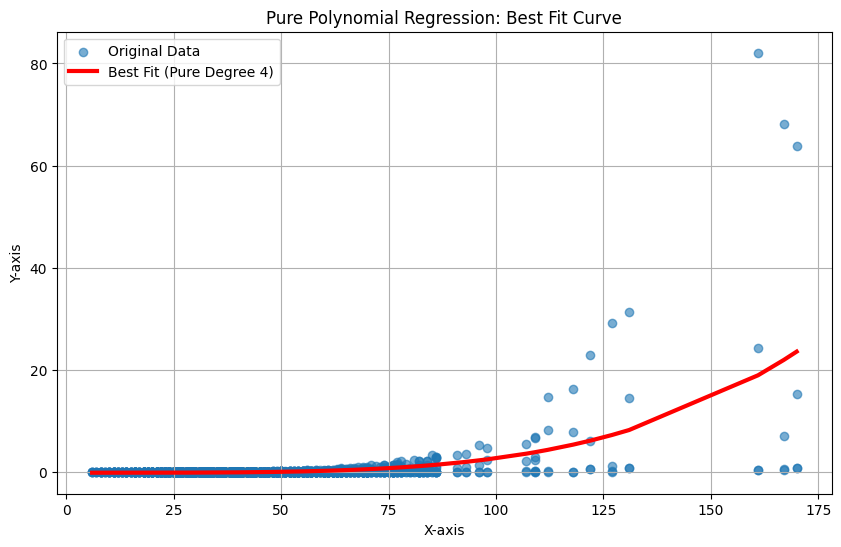

In [106]:
import numpy as np
from scipy.stats import linregress

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

x_values = []
y_values = []

for i, specific_data in enumerate(separate_data):
    # if i != 3:
    #     continue
    graph_data = [[x[-1], x[1]] for x in specific_data]
    for point in graph_data:
        x_values.append(point[0])
        y_values.append(point[1])

# Convert lists to NumPy arrays and reshape for scikit-learn
x_values = np.array(x_values).reshape(-1, 1)
y_values = np.array(y_values)

# --- Polynomial Regression Logic ---
degrees_to_test = [1, 2, 3, 4, 5]
best_degree = -1
best_r2_score = -1.0
results = {}

# Loop through different polynomial degrees to find the best fit
for degree in degrees_to_test:
    # 1. Manually create the pure polynomial feature (e.g., x^1, x^2, x^3...)
    x_poly = x_values ** degree

    # 2. Fit a linear model to this single feature
    model = LinearRegression()
    model.fit(x_poly, y_values)
    y_poly_pred = model.predict(x_poly)

    # 3. Evaluate the model using the R-squared score
    r2 = r2_score(y_values, y_poly_pred)
    results[degree] = {
        'r2_score': r2,
        'model': model,
        'y_pred': y_poly_pred
    }
    print(f"Degree {degree}: R-squared = {r2:.4f}")

    # 4. Keep track of the best-fitting degree
    if r2 > best_r2_score:
        best_r2_score = r2
        best_degree = degree

print(f"\nBest fitting pure polynomial is of degree {best_degree} with an R-squared score of {best_r2_score:.4f}")

# --- Visualization of the best-fit curve ---
# Sort x_values for a smooth plot
sorted_indices = np.argsort(x_values.flatten())
x_sorted = x_values[sorted_indices]

# Re-calculate the y_pred for plotting, using the best pure polynomial model
best_model = results[best_degree]['model']
x_best_poly = x_values[sorted_indices] ** best_degree
y_sorted_pred = best_model.predict(x_best_poly)


plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, label='Original Data', alpha=0.6)
plt.plot(x_sorted, y_sorted_pred, color='red', linewidth=3, label=f'Best Fit (Pure Degree {best_degree})')
plt.title('Pure Polynomial Regression: Best Fit Curve')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

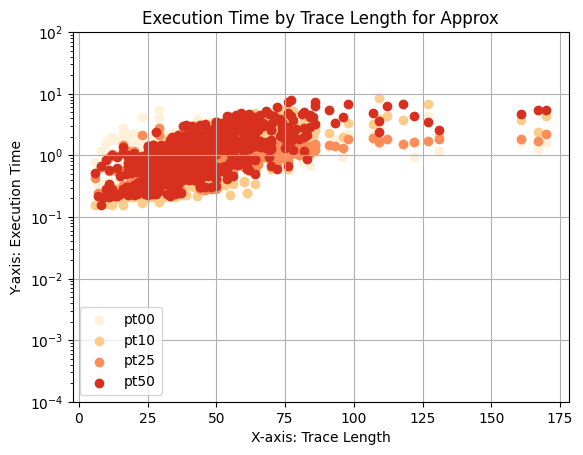

In [103]:
separate_data = [data[1000 * i: (i+1) * 1000] for i in range(num_files)]

# colors = ["red", "blue", "green", "yellow"]
colors = ["#fef0d9", "#fdcc8a", "#fc8d59", "#d7301f"]
# colors.reverse()

names = ["pt00", "pt10", "pt25", "pt50"]

for i, specific_data in enumerate(separate_data):
    # if i != 0:
    #     continue
    graph_data = [[x[-1], x[5]] for i, x in enumerate(specific_data)]
    # graph_data = [[x[-1], x[1]] for x in specific_data]
    # graph_data.sort(key=lambda x: x[0])

    x_values = [point[0] for point in graph_data]
    y_values = [point[1] for point in graph_data]

    plt.scatter(x_values, y_values, color=colors[i], label=names[i])

plt.yscale('log') # CDFs are always linear on Y

plt.xlabel("X-axis: Trace Length")
plt.ylabel("Y-axis: Execution Time")
plt.title("Execution Time by Trace Length for Approx")
ylim_fixed = (1e-4, 1e2) # You might still want a buffer for the upper limit
plt.ylim(ylim_fixed) # Apply the fixed Y-axis limits

# Add a grid (optional, but often helpful)
plt.grid(True)

# Add a legend to distinguish between datasets
plt.legend()

# Show the plot
plt.show()

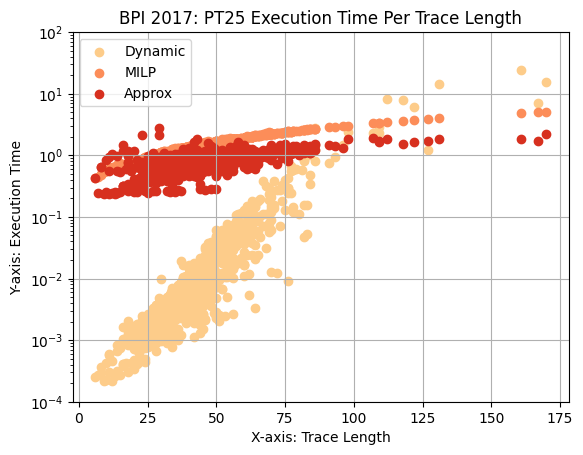

In [104]:
separate_data = [data[1000 * i: (i+1) * 1000] for i in range(num_files)]

# colors = ["red", "blue", "green", "yellow"]
colors = ["#fef0d9", "#fdcc8a", "#fc8d59", "#d7301f"]
# colors.reverse()

names = ["pt25"]

for i, specific_data in enumerate(separate_data):
    if i != 2:
        continue
    # if i != 0:
    #     continue
    # approx_data = [[x[-1], x[5]] for i, x in enumerate(specific_data)]
    # milp_data = [[x[-1], x[3]] for i, x in enumerate(specific_data)]
    # dyn_data = [[x[-1], x[]] for i, x in enumerate(specific_data)]

    graph_data = [[x[-1], x[1]] for x in specific_data]
    graph_data.sort(key=lambda x: x[0])

    x_values = [point[0] for point in graph_data]
    y_values = [point[1] for point in graph_data]

    plt.scatter(x_values, y_values, color=colors[1], label="Dynamic")

    graph_data = [[x[-1], x[3]] for x in specific_data]
    graph_data.sort(key=lambda x: x[0])

    x_values = [point[0] for point in graph_data]
    y_values = [point[1] for point in graph_data]

    plt.scatter(x_values, y_values, color=colors[2], label="MILP")

    graph_data = [[x[-1], x[5]] for x in specific_data]
    graph_data.sort(key=lambda x: x[0])

    x_values = [point[0] for point in graph_data]
    y_values = [point[1] for point in graph_data]

    plt.scatter(x_values, y_values, color=colors[3], label="Approx")

plt.yscale('log') # CDFs are always linear on Y

plt.xlabel("X-axis: Trace Length")
plt.ylabel("Y-axis: Execution Time")
plt.title("BPI 2017: PT25 Execution Time Per Trace Length")
ylim_fixed = (1e-4, 1e2) # You might still want a buffer for the upper limit
plt.ylim(ylim_fixed) # Apply the fixed Y-axis limits

# Add a grid (optional, but often helpful)
plt.grid(True)

# Add a legend to distinguish between datasets
plt.legend()

# Show the plot
plt.show()